# FP Projekt

### OPIS: Sigma total irregularity of triangle-free graphs

Imamo grafe brez ciklov dolžine 3 (obseg > 3). "order n" = "red n" = |V|. 

Iščemo grafe reda n z največjo sigma čisto nepravilnostjo (sigma total irregularity),
ki je definirana kot vsota kvadratov razlik stopenj vozlišč po vseh parih vozlišč.

mogoče add random path za metahevristike

### Sigma total irregularity

Opazka: grafi brez povezav imajo sigma čisto nepravilnost enako 0, grafi z eno povezavo pa (n - 2) * 2

Lahko računamo preko matrike sosednosti - vsota enk v vrstici je stopnja vozlišča

### Grafi brez 3-ciklov

povezavo ustvariš, če med u in v ni poti ali je razdalja med u in v večja od 2

Graf je brez 3-ciklov, natanko tedaj ko je sled kuba matrike sosednosti enaka 0.

### Teorija

Iskani grafi imajo obliko zvezde, kjer je lahko več vozlišč v centru. Zaradi omejitve brez treh ciklov vozlisca v centru niso povezana med sabo, prav tako niso povezana med sabo vozlišča na robu. 

Teorija je tudi, da se število centralnih vozlišč povečuje.

### Metahevristike

Tabu search, simulated annealing, VNS.

In [49]:
#knjižnice
import networkx as nx
from itertools import combinations, product
import matplotlib.pyplot as plt
import numpy as np

## Preko ustvarjanja grafov

In [32]:
def generating_graphs(n): # n število vozlišč
    nodes = list(range(n))
    triangle_free_graphs = [] #  seznam primernih grafov

    def is_triangle_free(G): # funkcija za preverjanje trikotnikov
        return all(count == 0 for count in nx.triangles(G).values())

    # število povezav
    for i in range(len(list(combinations(nodes, 2)))):
        
        # kombinacije na povezav glede na število povezav
        for edges in combinations(combinations(nodes, 2), i):
            
            unique = True # True, če takega še nimamo
            G = nx.Graph()
            G.add_nodes_from(nodes)
            G.add_edges_from(edges)
            
            for graph in triangle_free_graphs: # preverjamo, če že imamo podoben graf
                if nx.is_isomorphic(G, graph):
                    unique = False
                    break
            
            if unique == False:
                continue

            if is_triangle_free(G): # če je trikoten, mogoče pred isomorfnostjo
                triangle_free_graphs.append(G)

    return triangle_free_graphs

# računanje sigma nepravilnosti z uporabo degree()
def sigma_irregularity_via_degree(G):
    return sum((G.degree[u] - G.degree[v]) ** 2 for u, v in combinations(G.nodes, 2))

# računanje sigma nepravilnosti preko matrike sosednosti
def sigma_irregularity_via_adj_matrix(G):
    adj_matrix = nx.adjacency_matrix(G).toarray()

    return sum((u - v) ** 2 for u, v in combinations(np.sum(adj_matrix, axis = 1),2))

In [ ]:
# risanje grafov
n  = 3
graphs = generating_graphs(n)
def draw_graphs(graph_list):

    num_graphs = len(graph_list)
    cols = 3  # Number of graphs per row
    rows = (num_graphs + cols - 1) // cols  # Calculate the required rows

    # Create a figure
    plt.figure(figsize=(cols * 4, rows * 4))  # Adjust size as needed

    for i, G in enumerate(graph_list):
        plt.subplot(rows, cols, i + 1)
        nx.draw(G, with_labels=True, node_color='skyblue', node_size=500, font_size=10)
        sigma = sigma_irregularity_via_degree(G) # dodamo sigma irregularity
        plt.title(f"Graph {i + 1}, Sigma {sigma}")

    plt.tight_layout()
    plt.show()

draw_graphs(graphs)

In [73]:
# grafi z največjimi sigma čistimi nepravilnstmi
n = 5
# vrne max sigma nepravilnost za grafe do n vozlisc
def max_sigma_irregularities(n, show=False):
    for i in range(1, n + 1):

        max_sigma = 0
        graphs_with_max_sigma = []
        graphs = generating_graphs(i)

        for G in graphs:
            sigma = sigma_irregularity_via_degree(G)

            if sigma > max_sigma: # nova maks sigma
                graphs_with_max_sigma = [G]
                max_sigma = sigma
            
            elif sigma == max_sigma:
                graphs_with_max_sigma.append(G)
        
        print(f"Grafi reda {i}, max_sigma = {max_sigma}")
        if show == True:

            num_graphs = len(graphs_with_max_sigma)
            cols = 3  # Number of graphs per row
            rows = (num_graphs + cols - 1) // cols  # Calculate the required rows

            # Create a figure
            plt.figure(figsize=(cols * 4, rows * 4))  # Adjust size as needed

            for i, G in enumerate(graphs_with_max_sigma):
                plt.subplot(rows, cols, i + 1)
                nx.draw(G, with_labels=True, node_color="orange", node_size=500, font_size=10)
                plt.title(f"Graph {i + 1}")

            plt.tight_layout()
            plt.show()
    
max_sigma_irregularities(n, False)
    


Grafi reda 1, max_sigma = 0
Grafi reda 2, max_sigma = 0
Grafi reda 3, max_sigma = 2
Grafi reda 4, max_sigma = 12
Grafi reda 5, max_sigma = 36


## Preko matrike sosednosti

Tu predpostavljamo, da je sled kuba incidenčne matrike 0, natanko tedaj ko graf nima ciklov dolžine 3

In [67]:
# z knjižnico numpy, n je število vozlišč
def graph_generation_using_numpy(n):
    
    triangle_free = []
    length_of_option = ((n-1) * n) / 2
    indices = np.triu_indices(n, k=1)
    #checked_matrices = [] 
    # iščemo upper od matrike, ker vemo da je simetrična
    for option in product([0,1], repeat=int(length_of_option)):
        # ustvari matriko
        matrix = np.zeros((n, n))
        matrix[indices] = option
        matrix = matrix + matrix.T

        #rotated_matrix = tuple(np.rot90(matrix, k=2).flatten())
        # prvi check isomorfizmov
        #if rotated_matrix in checked_matrices:
         #   continue

       # checked_matrices.append(tuple(matrix.flatten()))

        # preveri če je trikotna
        if np.trace(np.linalg.matrix_power(matrix, 3)) == 0:
            triangle_free.append(matrix)
    
    return triangle_free

def sigma_irr_numpy(G):
    return sum((u - v) ** 2 for u, v in combinations(np.sum(G, axis = 1),2))

Grafi reda 1, max_sigma = 0


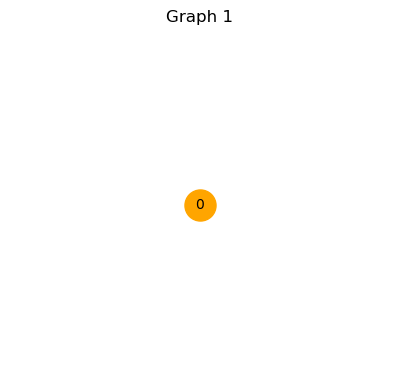

Grafi reda 2, max_sigma = 0


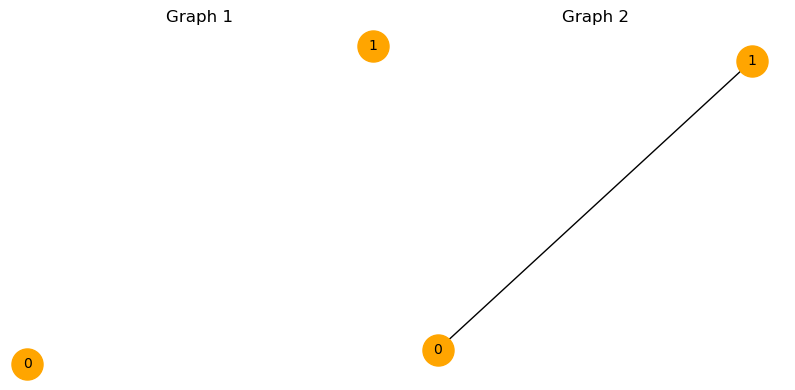

Grafi reda 3, max_sigma = 2.0


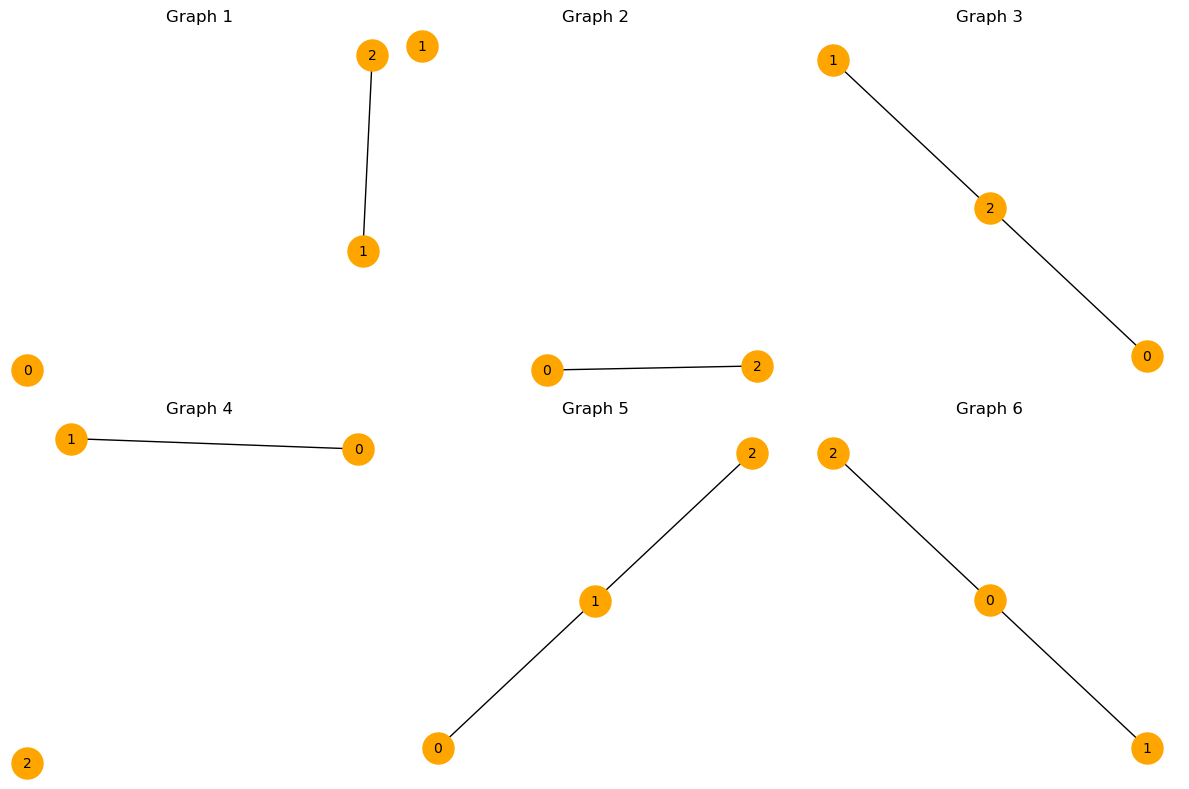

Grafi reda 4, max_sigma = 12.0


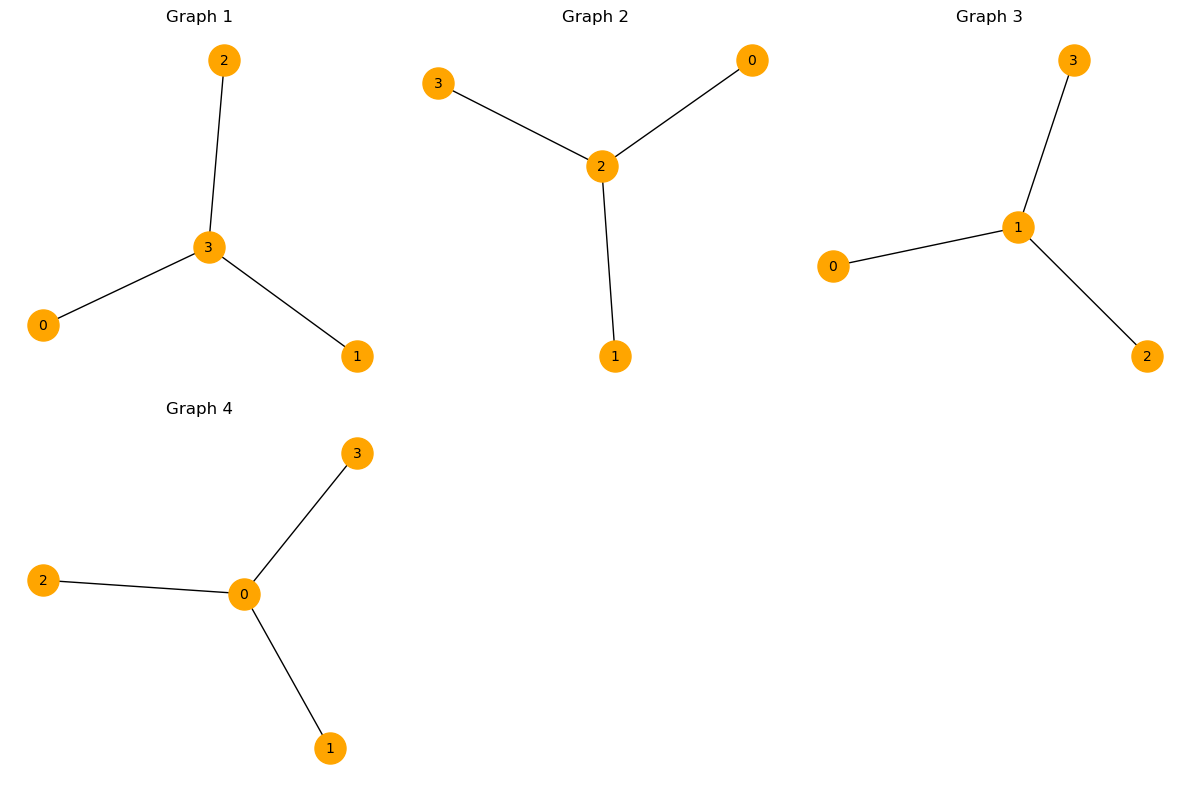

Grafi reda 5, max_sigma = 36.0


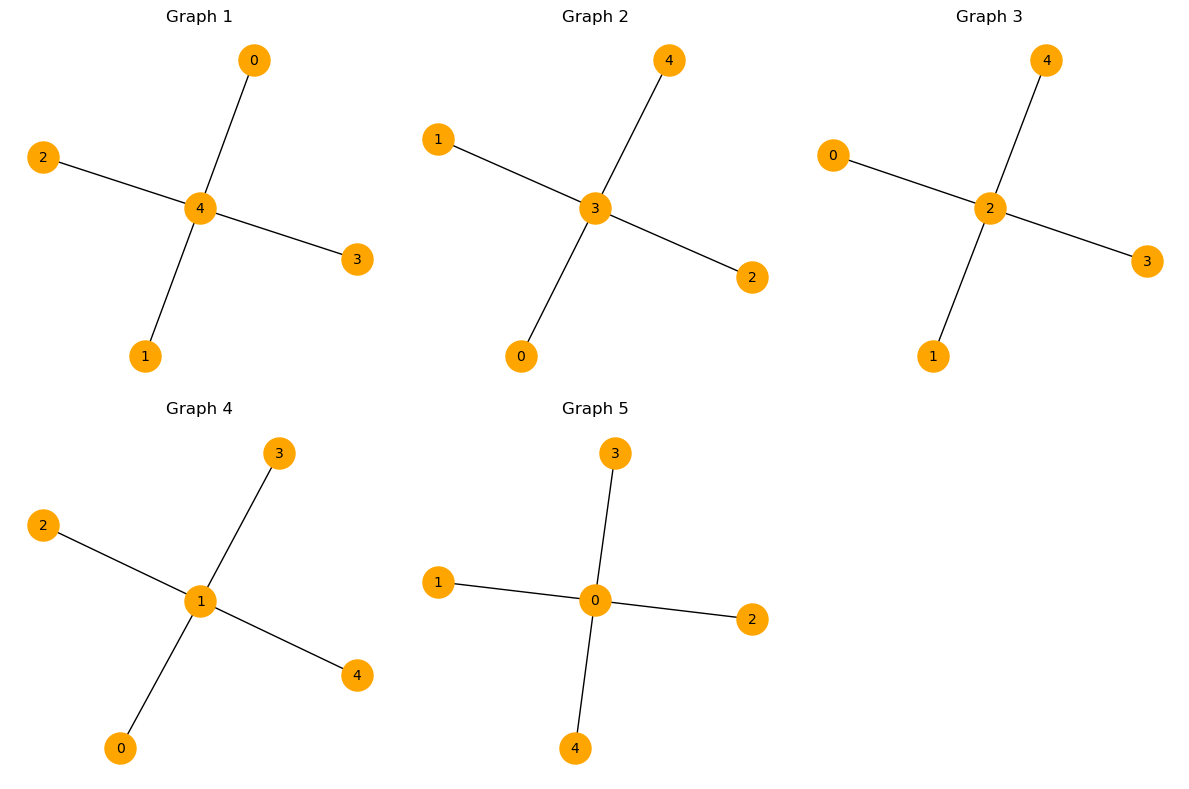

Grafi reda 6, max_sigma = 80.0


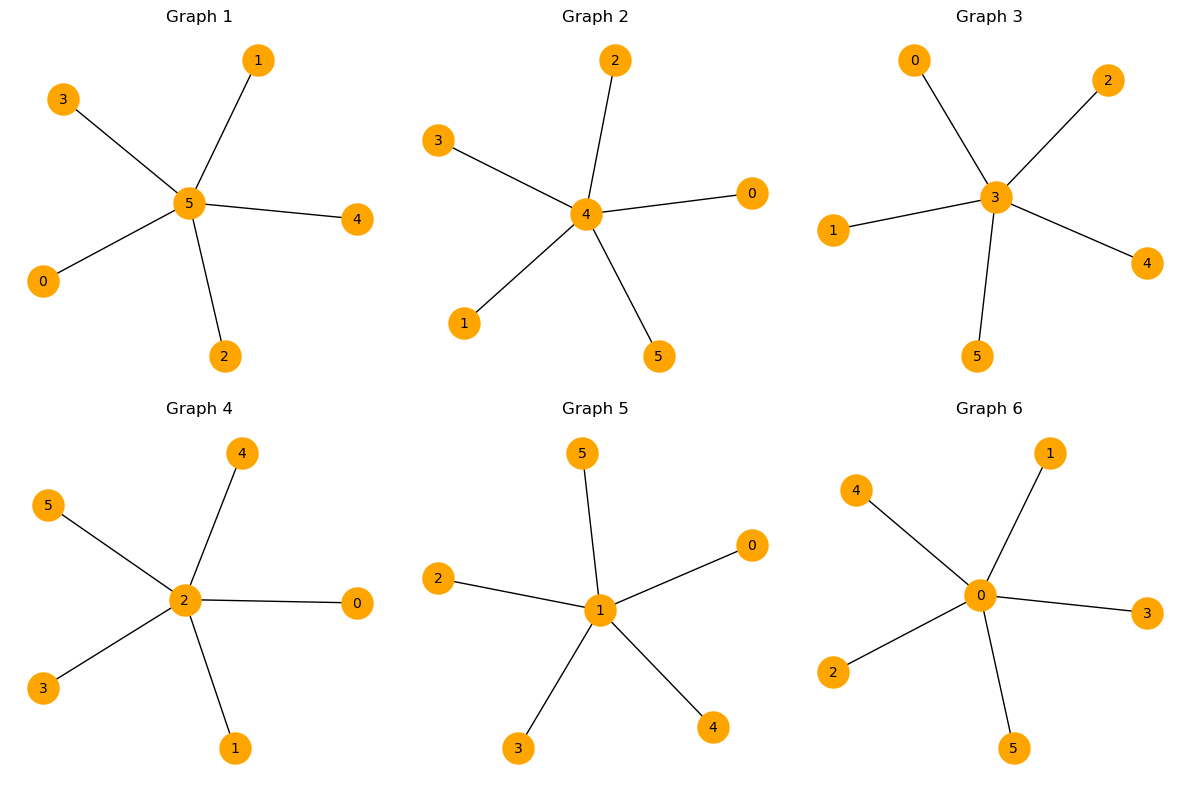

Grafi reda 7, max_sigma = 150.0


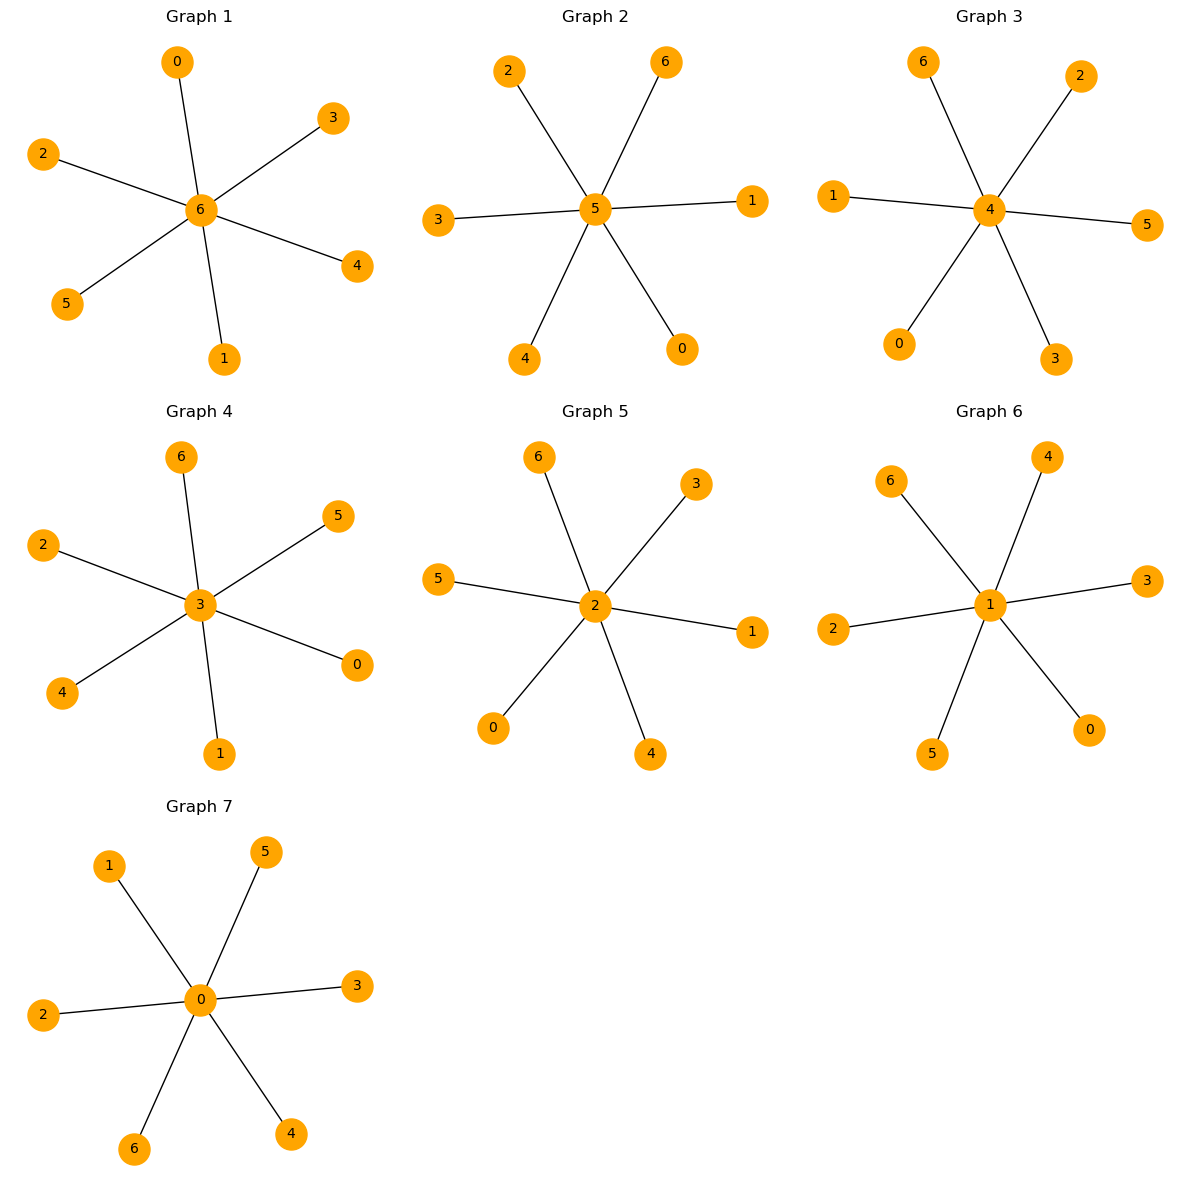

KeyboardInterrupt: 

In [81]:
# pridobivamo max sigma irregularities
def max_sigma_irr_numpy(k, n, show=False):
    for i in range(k, n + 1):

        max_sigma = 0
        graphs_with_max_sigma = []
        graphs = graph_generation_using_numpy(i)

        for G in graphs:
            sigma = sigma_irr_numpy(G)

            if sigma > max_sigma: # nova maks sigma
                graphs_with_max_sigma = [G]
                max_sigma = sigma
            
            elif sigma == max_sigma:
                graphs_with_max_sigma.append(G)
        
        print(f"Grafi reda {i}, max_sigma = {max_sigma}")
        if show == True:

            num_graphs = len(graphs_with_max_sigma)
            cols = 3  # Number of graphs per row
            rows = (num_graphs + cols - 1) // cols  # Calculate the required rows

            # Create a figure
            plt.figure(figsize=(cols * 4, rows * 4))  # Adjust size as needed

            for i, G in enumerate(graphs_with_max_sigma):
                plt.subplot(rows, cols, i + 1)
                Graph = nx.from_numpy_array(G)
                nx.draw(Graph, with_labels=True, node_color="orange", node_size=500, font_size=10)
                plt.title(f"Graph {i + 1}")

            plt.tight_layout()
            plt.show()
    
max_sigma_irr_numpy(1, 5, True)
max_sigma_irr_numpy(6, 10, True)
max_sigma_irr_numpy(11, 15, True)
max_sigma_irr_numpy(16, 20, True)